In [1]:
%matplotlib inline
%load_ext autoreload

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import scipy, scipy.stats, scipy.integrate
from scipy import interpolate
import coulomb_oscillations_analysis as coa
import math
pi = math.pi

def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

kB = 1.38064852e-23
e = 1.6021766208e-19
h = 6.626070040e-34

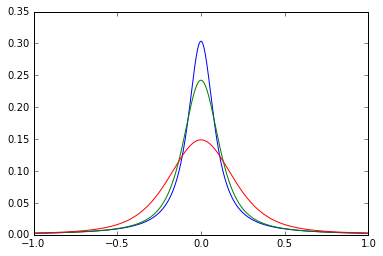

In [3]:
alpha = 0.072 #lever arm old: 0.190/1.4, 0.144


def thermal_broadening(E, T):    
    return (1/(4.0*kB*T))*(np.cosh(E/(2.0*kB*T)))**(-2)


def Breit_Wigner(E, A, Vg, Vg_0, Gamma):
    'in units of 2e2/h'
    return 1/2/A/pi*h*Gamma/((h*Gamma/2)**2+(alpha*e*(Vg-Vg_0)-E)**2)


def CoulIntergrand(E, A, Vg, Vg_0, Gamma, T):
    'the intergrand for the Coulomb peak'
    return  thermal_broadening(E, T) * Breit_Wigner(E, A, Vg, Vg_0, Gamma) 


def G_CP(A, Vg, Vg_0, Gamma, T, offset):
    
    sampleE =  np.linspace(-10*kB*T-4*h*Gamma,10*kB*T+4*h*Gamma,10000)
    return scipy.integrate.simps(CoulIntergrand(sampleE, A, Vg, Vg_0, Gamma, T), x=sampleE) + offset
    #return np.sign(V) * scipy.integrate.quad(CoulIntergrand,Delta*e,np.inf,args=( Delta*e,gamma, T,V))[0]


testVg = np.linspace(-0.001,0.001,500)
for t in [0.01,0.03,0.08]:
    testG = [G_CP(A=1e24, Vg=el, Vg_0=0, Gamma=3e9, T=t, offset=0) for el in testVg]
    plt.plot(testVg/1e-3,testG)


def ifitter(Vgate, Vg_0, A, Gamma, T, offset):
    #print(h*Gamma/e/1e-6, 4*kB*T/e/1e-6, Gamma/1e9, T)
    return [G_CP(A=A, Vg=el, Vg_0=Vg_0, Gamma=Gamma, T=T, offset=offset) for el in Vgate]

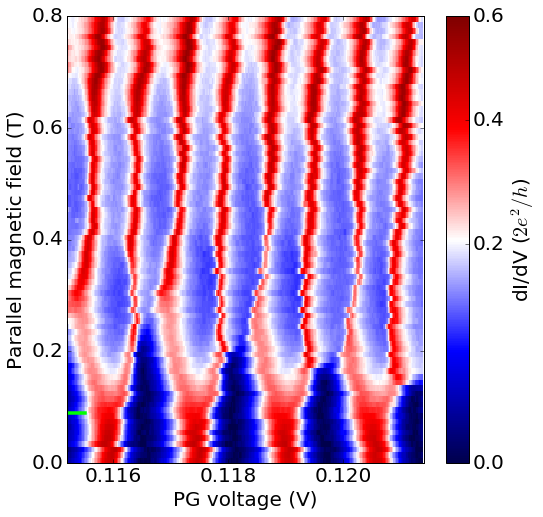

0.09


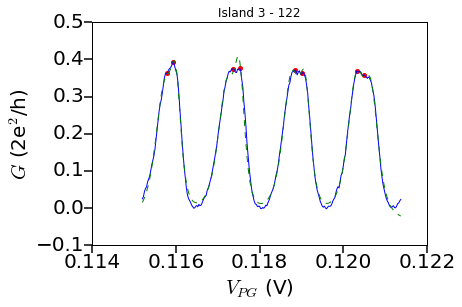

In [26]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.09 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=5, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
addel = 0.1158
listpeaks.insert(0, addel)
peaks2 = peaks.tolist()
peaks2.insert(0, x_coord.tolist().index(find_nearest(x_coord, addel)))
peaks = np.array(peaks2)
#addel = 0.1173
#listpeaks.insert(2, addel)
#peaks2 = peaks.tolist()
#peaks2.insert(2, x_coord.tolist().index(find_nearest(x_coord, addel)))
#peaks = np.array(peaks2)
#addel = 0.11905
#listpeaks.insert(5, addel)
#peaks2 = peaks.tolist()
#peaks2.insert(5, x_coord.tolist().index(find_nearest(x_coord, addel)))
#peaks = np.array(peaks2)
#addel = 0.1206
#listpeaks.insert(7, addel)
#peaks2 = peaks.tolist()
#peaks2.insert(7, x_coord.tolist().index(find_nearest(x_coord, addel)))
#peaks = np.array(peaks2)
ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

print(linecut)
fit_single_trace = True
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.0000001, maxfev = 1700)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = False
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.00, 0.08, 9)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [28]:
print(popt_list)
print(pcov_list)

[array([  1.15725434e-01,   1.16003659e-01,   1.17221485e-01,
         1.17525178e-01,   1.18761006e-01,   1.19094330e-01,
         1.20304289e-01,   1.20669607e-01,   3.38203112e+23,
         1.10097340e+24,   3.26723007e+23,   1.00959940e+24,
         3.32143766e+23,   9.01801963e+23,   3.65963121e+23,
         5.74390753e+23,   5.86073898e+09,   3.73490504e+07,
         6.01303928e+09,   5.13804226e+06,   5.50476320e+09,
         8.58658563e+08,   5.25126471e+09,   3.28578844e+09,
         6.50714728e-02,  -4.53823653e-02])]
[array([[  2.47905082e-10,   9.00365703e-11,   6.16207633e-13,
          3.96592578e-15,   1.33688502e-11,   8.83919703e-12,
         -1.50253411e-12,   1.46014770e-12,  -4.47777062e+17,
          3.32869775e+18,   1.18737395e+16,  -5.49746206e+16,
         -5.89691998e+16,   1.22106879e+17,  -2.66028824e+16,
         -5.98689681e+16,   6.08267679e+03,  -7.86188098e+03,
         -4.46840336e+02,  -9.51070484e-02,   1.17431057e+03,
         -2.23379031e+02,   6.3

In [30]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
fit_array = np.array([  1.15725434e-01,   1.16003659e-01,   1.17221485e-01,
         1.17525178e-01,   1.18761006e-01,   1.19094330e-01,
         1.20304289e-01,   1.20669607e-01,   3.38203112e+23,
         1.10097340e+24,   3.26723007e+23,   1.00959940e+24,
         3.32143766e+23,   9.01801963e+23,   3.65963121e+23,
         5.74390753e+23,   5.86073898e+09,   3.73490504e+07,
         6.01303928e+09,   5.13804226e+06,   5.50476320e+09,
         8.58658563e+08,   5.25126471e+09,   3.28578844e+09,
         6.50714728e-02,  -4.53823653e-02])
G2 = nifitter(Vgates, *fit_array)
peaks = coa.detect_peaks(G2, mph=0.25, mpd=6, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
print([G2[x] for x in peaks])

[0.39661543707088626, 0.4085969981587263, 0.3709340087718033, 0.37378855410446393, 0.3707651160768513, 0.35699707620128074]


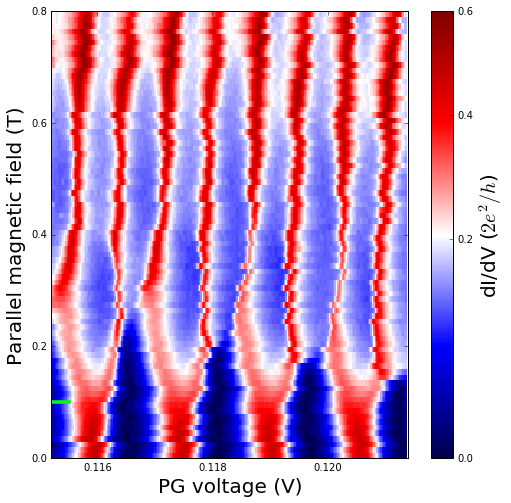

0.1


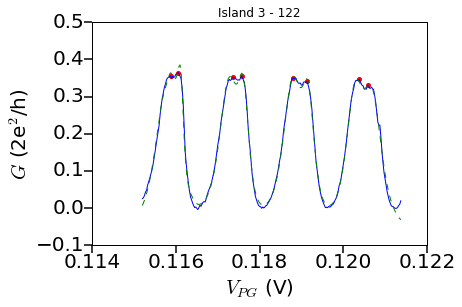

In [4]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.10 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.25, mpd=6, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

print(linecut)
fit_single_trace = True
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.0000002, maxfev = 1700)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = False
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.00, 0.08, 9)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [5]:
print(popt_list)
print(pcov_list)

[array([  1.15761095e-01,   1.16058250e-01,   1.17269365e-01,
         1.17619067e-01,   1.18788359e-01,   1.19167245e-01,
         1.20271533e-01,   1.20697494e-01,   2.54207897e+23,
         1.13264651e+24,   2.71652022e+23,   9.98242253e+23,
         2.83457568e+23,   7.97599321e+23,   4.03602603e+23,
         3.45754639e+23,   8.24796378e+09,   1.68674100e+06,
         7.10344339e+09,   6.54485618e+08,   6.80586916e+09,
         1.65301221e+09,   5.28205389e+09,   6.51621915e+09,
         6.28457046e-02,  -7.94367674e-02])]
[array([[  6.72988999e-11,  -4.32355716e-14,  -1.72155010e-11,
         -5.59985136e-12,   5.92731754e-12,   5.51492116e-12,
         -4.37950850e-12,  -1.15708960e-12,  -7.37921844e+16,
          6.44878051e+17,   2.71150537e+16,  -2.94913281e+17,
         -3.35120809e+16,   4.52703930e+16,  -8.29553185e+15,
         -3.45164933e+16,   2.13249016e+03,   1.66612568e-01,
         -8.38630639e+02,   8.97880005e+02,   8.53967687e+02,
         -6.57608259e+01,   2.6

In [6]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
fit_array = np.array([  1.15761095e-01,   1.16058250e-01,   1.17269365e-01,
         1.17619067e-01,   1.18788359e-01,   1.19167245e-01,
         1.20271533e-01,   1.20697494e-01,   2.54207897e+23,
         1.13264651e+24,   2.71652022e+23,   9.98242253e+23,
         2.83457568e+23,   7.97599321e+23,   4.03602603e+23,
         3.45754639e+23,   8.24796378e+09,   1.68674100e+06,
         7.10344339e+09,   6.54485618e+08,   6.80586916e+09,
         1.65301221e+09,   5.28205389e+09,   6.51621915e+09,
         6.28457046e-02,  -7.94367674e-02])
G2 = nifitter(Vgates, *fit_array)
peaks = coa.detect_peaks(G2, mph=0.25, mpd=6, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
print([G2[x] for x in peaks])

[0.36402232313721256, 0.38510105496710245, 0.353987677185391, 0.3627768161601514, 0.3543972440757307, 0.3484448827218363, 0.3471387086210924, 0.3314729990214547]


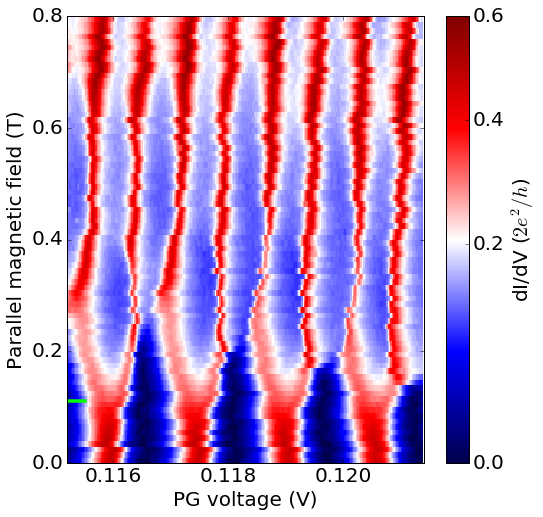

0.11


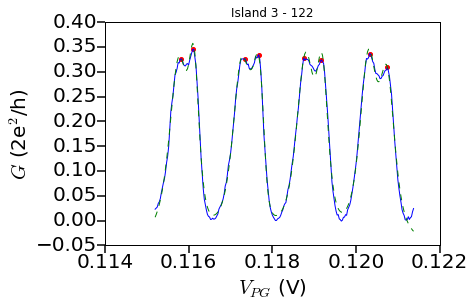

In [33]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.11 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.25, mpd=6, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

print(linecut)
fit_single_trace = True
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.0000002, maxfev = 1700)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = False
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.00, 0.08, 9)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [34]:
print(popt_list)
print(pcov_list)

[array([  1.15764093e-01,   1.16130391e-01,   1.17270780e-01,
         1.17649058e-01,   1.18789913e-01,   1.19197371e-01,
         1.20290455e-01,   1.20745351e-01,   3.12389985e+23,
         1.00749033e+24,   3.39266088e+23,   8.96866968e+23,
         3.30393703e+23,   7.95830534e+23,   3.78519153e+23,
         5.03362046e+23,   6.36502867e+09,   1.87414503e+08,
         5.68321356e+09,   2.04114643e+06,   5.92673951e+09,
         1.31608603e+09,   5.01696589e+09,   3.95924682e+09,
         6.43991334e-02,  -5.29405260e-02])]
[array([[  4.94492273e-11,   1.94986726e-11,   3.36219508e-13,
          3.96731741e-16,   5.95825452e-13,   9.91657426e-13,
         -7.65871237e-13,   5.28256085e-13,  -7.62700588e+16,
          5.24927170e+17,   2.14670995e+15,  -9.68245127e+15,
         -7.26977124e+15,   9.89548732e+14,  -4.41351550e+15,
         -1.06123168e+16,   1.69472858e+03,  -1.61622857e+03,
         -6.44726366e+01,  -1.13089560e-02,   1.57445107e+02,
          1.66159756e+01,   8.5

In [35]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
fit_array = np.array([  1.15764093e-01,   1.16130391e-01,   1.17270780e-01,
         1.17649058e-01,   1.18789913e-01,   1.19197371e-01,
         1.20290455e-01,   1.20745351e-01,   3.12389985e+23,
         1.00749033e+24,   3.39266088e+23,   8.96866968e+23,
         3.30393703e+23,   7.95830534e+23,   3.78519153e+23,
         5.03362046e+23,   6.36502867e+09,   1.87414503e+08,
         5.68321356e+09,   2.04114643e+06,   5.92673951e+09,
         1.31608603e+09,   5.01696589e+09,   3.95924682e+09,
         6.43991334e-02,  -5.29405260e-02])
G2 = nifitter(Vgates, *fit_array)
peaks = coa.detect_peaks(G2, mph=0.25, mpd=6, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
print([G2[x] for x in peaks])

[0.331767586273916, 0.3574353100586107, 0.33186352637956085, 0.3369891756794497, 0.33973838202650103, 0.3393847849350245, 0.34567197414646983, 0.3152236341144551]


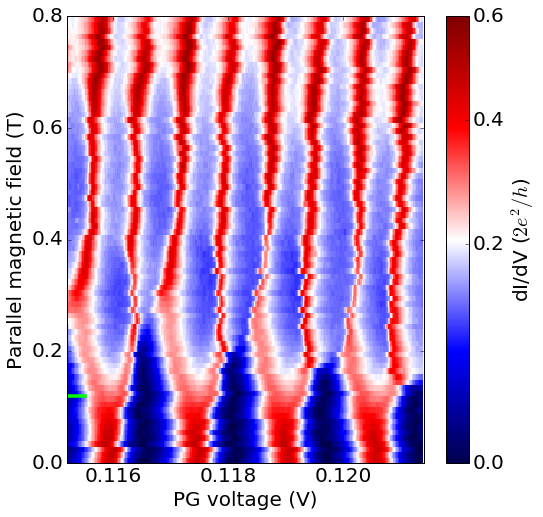

0.12


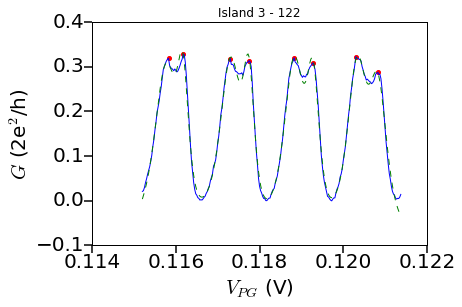

In [37]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.12 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.25, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

print(linecut)
fit_single_trace = True
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.0000002, maxfev = 1700)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = False
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.00, 0.08, 9)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [40]:
print(popt_list)
print(pcov_list)

[array([  1.15760634e-01,   1.16173337e-01,   1.17306193e-01,
         1.17745708e-01,   1.18823682e-01,   1.19280421e-01,
         1.20325078e-01,   1.20833258e-01,   2.41316641e+23,
         9.80156311e+23,   2.62202607e+23,   9.17784019e+23,
         2.84714825e+23,   7.34082595e+23,   3.22719938e+23,
         4.25142164e+23,   8.36457952e+09,   2.15726262e+07,
         7.22744120e+09,   9.23263706e+06,   6.46726808e+09,
         1.04211807e+09,   5.80295074e+09,   4.76568906e+09,
         7.23683711e-02,  -9.08846591e-02])]
[array([[  8.60682454e-11,   2.97007160e-11,  -1.55012702e-12,
          2.46217790e-12,   3.62310575e-13,   1.73922357e-12,
         -1.42100248e-12,   1.57976653e-12,  -8.89808497e+16,
          8.56193916e+17,   1.07907684e+16,  -5.82830028e+16,
         -1.02900298e+16,  -2.72110056e+14,  -7.27726178e+15,
         -1.44227274e+16,   3.13022204e+03,  -2.98585603e+03,
         -4.32370246e+02,   1.60765716e+02,   2.20549730e+02,
         -2.92992541e+01,   1.2

In [41]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
fit_array = np.array([  1.15760634e-01,   1.16173337e-01,   1.17306193e-01,
         1.17745708e-01,   1.18823682e-01,   1.19280421e-01,
         1.20325078e-01,   1.20833258e-01,   2.41316641e+23,
         9.80156311e+23,   2.62202607e+23,   9.17784019e+23,
         2.84714825e+23,   7.34082595e+23,   3.22719938e+23,
         4.25142164e+23,   8.36457952e+09,   2.15726262e+07,
         7.22744120e+09,   9.23263706e+06,   6.46726808e+09,
         1.04211807e+09,   5.80295074e+09,   4.76568906e+09,
         7.23683711e-02,  -9.08846591e-02])
G2 = nifitter(Vgates, *fit_array)
peaks = coa.detect_peaks(G2, mph=0.25, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
print([G2[x] for x in peaks])

[0.30899941634102357, 0.33566096742557033, 0.3220202872652722, 0.32895666789575057, 0.32400698235789216, 0.32099346148196917, 0.3254935429691418, 0.2896857103236255]


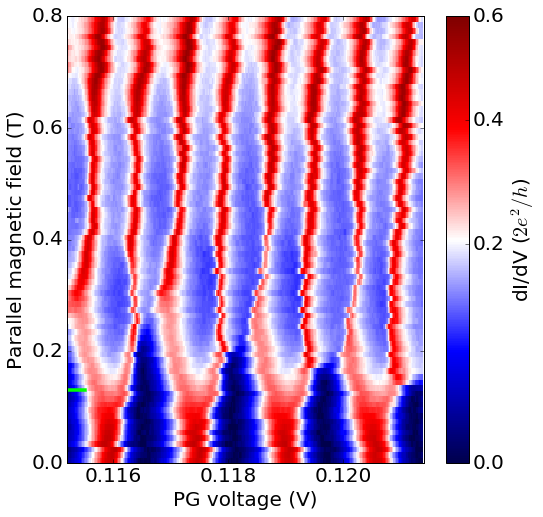

0.13


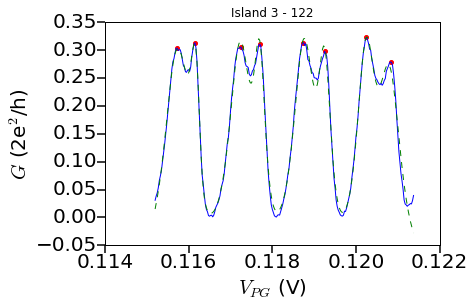

In [61]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.13 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.25, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

print(linecut)
fit_single_trace = True
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.0000004, maxfev = 1200)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = False
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.00, 0.08, 9)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [62]:
print(popt_list)
print(pcov_list)

[array([  1.15715753e-01,   1.16115945e-01,   1.17231407e-01,
         1.17701633e-01,   1.18755086e-01,   1.19253515e-01,
         1.20235011e-01,   1.20803450e-01,   2.13539013e+23,
         1.17060178e+24,   2.40644922e+23,   8.48470077e+23,
         2.52327965e+23,   7.00104706e+23,   3.53198206e+23,
         2.88148389e+23,   9.90812311e+09,   1.55829342e+06,
         8.55209993e+09,   1.11460010e+09,   7.96454747e+09,
         2.04559598e+09,   5.81387071e+09,   8.40263922e+09,
         6.17430211e-02,  -1.12892527e-01])]
[array([[  5.19670928e-11,  -2.42984640e-14,  -6.21896713e-12,
         -2.20946172e-12,  -8.56338651e-13,   3.01195678e-12,
         -3.45412197e-12,   3.07054081e-12,  -5.34595440e+16,
          4.86742477e+17,   1.11124969e+16,  -1.35229272e+17,
         -2.01597239e+16,  -1.78352378e+16,  -1.54172325e+16,
         -2.53705095e+16,   2.51493247e+03,  -3.38042547e-01,
         -6.64445721e+02,   5.52985510e+02,   5.64956296e+02,
          1.33627783e+02,   2.9

In [63]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
fit_array = np.array([  1.15715753e-01,   1.16115945e-01,   1.17231407e-01,
         1.17701633e-01,   1.18755086e-01,   1.19253515e-01,
         1.20235011e-01,   1.20803450e-01,   2.13539013e+23,
         1.17060178e+24,   2.40644922e+23,   8.48470077e+23,
         2.52327965e+23,   7.00104706e+23,   3.53198206e+23,
         2.88148389e+23,   9.90812311e+09,   1.55829342e+06,
         8.55209993e+09,   1.11460010e+09,   7.96454747e+09,
         2.04559598e+09,   5.81387071e+09,   8.40263922e+09,
         6.17430211e-02,  -1.12892527e-01])
G2 = nifitter(Vgates, *fit_array)
peaks = coa.detect_peaks(G2, mph=0.25, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
print([G2[x] for x in peaks])

[0.3026137439088997, 0.3123666650222345, 0.31568744321935127, 0.3203710591922636, 0.3208641139476374, 0.30753633457412766, 0.32328262391259527, 0.2743600892349498]


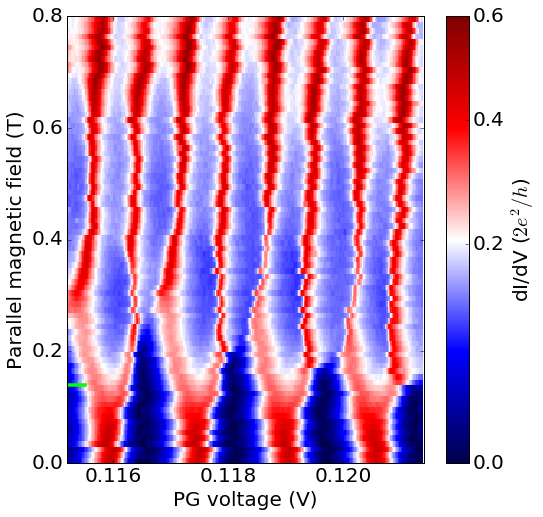

0.14


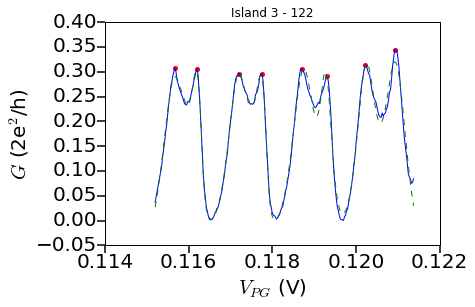

In [49]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.14 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.25, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

print(linecut)
fit_single_trace = True
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.00000002, maxfev = 2000)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = False
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.00, 0.08, 9)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [50]:
print(popt_list)
print(pcov_list)

[array([  1.15666382e-01,   1.16142415e-01,   1.17202416e-01,
         1.17683006e-01,   1.18747396e-01,   1.19287310e-01,
         1.20239314e-01,   1.20950763e-01,   1.99524660e+23,
         8.87791592e+23,   2.26071876e+23,   8.28783674e+23,
         2.12960037e+23,   7.56929472e+23,   2.95483042e+23,
         2.29864245e+23,   1.03015123e+10,   1.49218328e+06,
         9.04150201e+09,   1.45393646e+06,   9.54676479e+09,
         1.48455792e+09,   6.74583069e+09,   8.50955174e+09,
         6.44134857e-02,  -1.34857830e-01])]
[array([[  2.56812348e-11,  -7.57627275e-15,   6.11617373e-13,
          8.44936926e-16,  -2.03691813e-13,   2.62151100e-13,
         -1.29587284e-13,   2.23410990e-13,  -1.66348069e+16,
          1.40202687e+17,   7.76610845e+15,  -2.67316245e+16,
         -1.98041395e+15,   1.31897072e+15,  -1.01122353e+15,
         -9.70466880e+14,   1.10782068e+03,  -2.83534876e-03,
         -3.82527928e+02,  -2.65628747e-02,   8.03537084e+01,
         -4.20514215e+00,   1.9

In [51]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
fit_array = np.array([  1.15666382e-01,   1.16142415e-01,   1.17202416e-01,
         1.17683006e-01,   1.18747396e-01,   1.19287310e-01,
         1.20239314e-01,   1.20950763e-01,   1.99524660e+23,
         8.87791592e+23,   2.26071876e+23,   8.28783674e+23,
         2.12960037e+23,   7.56929472e+23,   2.95483042e+23,
         2.29864245e+23,   1.03015123e+10,   1.49218328e+06,
         9.04150201e+09,   1.45393646e+06,   9.54676479e+09,
         1.48455792e+09,   6.74583069e+09,   8.50955174e+09,
         6.44134857e-02,  -1.34857830e-01])
G2 = nifitter(Vgates, *fit_array)
peaks = coa.detect_peaks(G2, mph=0.25, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
print([G2[x] for x in peaks])

[0.2901964119084883, 0.3019830395509059, 0.2969213768813548, 0.292839941218204, 0.3060712845588871, 0.3008709238966103, 0.3171549214078475, 0.32004373064406266]


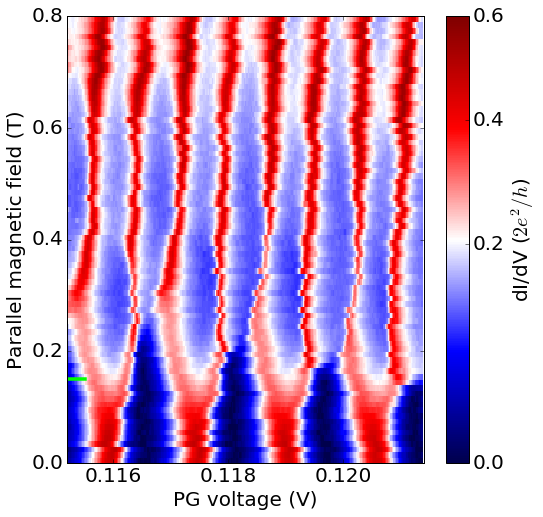

0.15


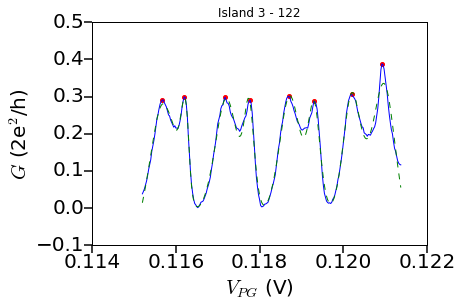

0.16


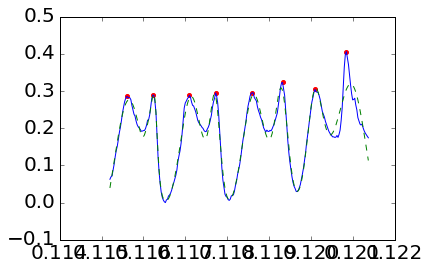

0.17


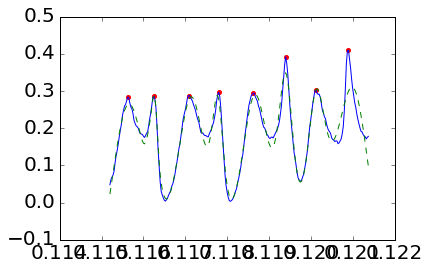

0.18


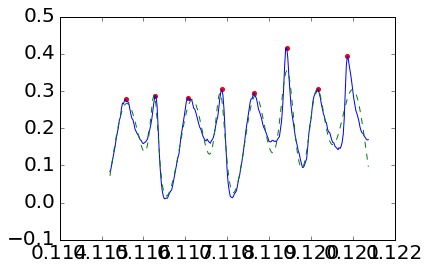

0.19


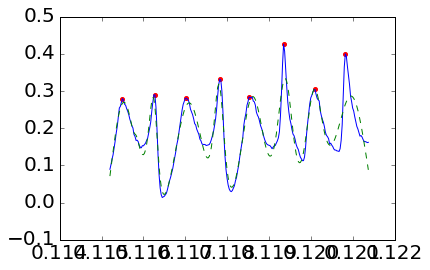

0.2


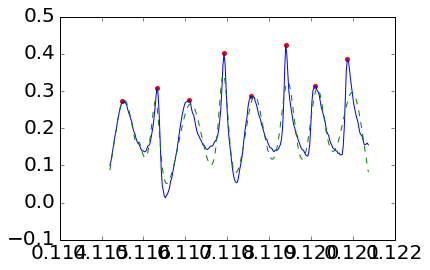

0.21


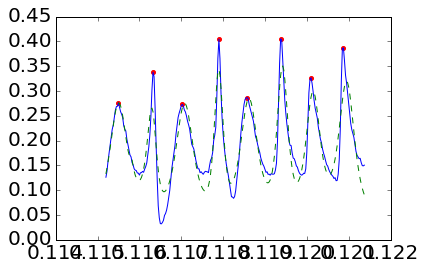

0.22


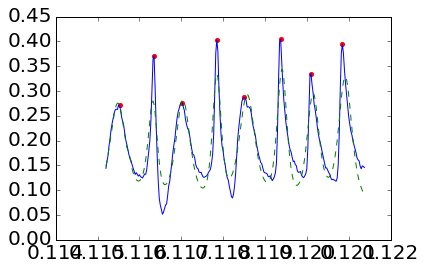

0.23


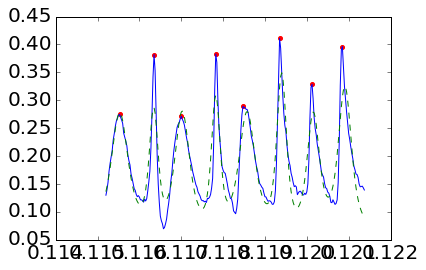

0.24


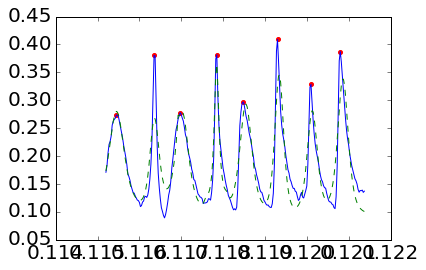

0.25


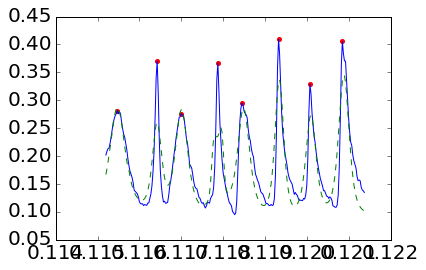

0.26


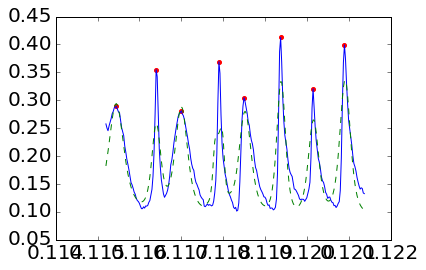

0.27


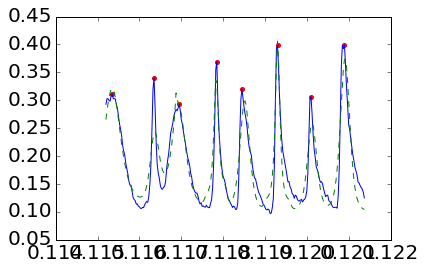

0.28


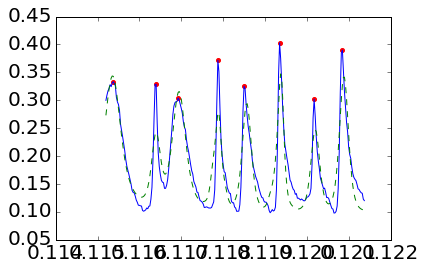

0.29


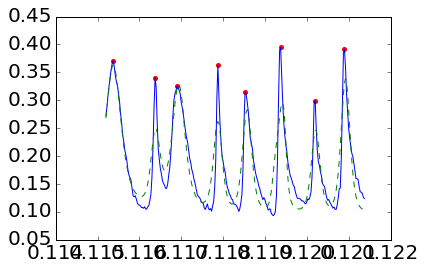

0.3


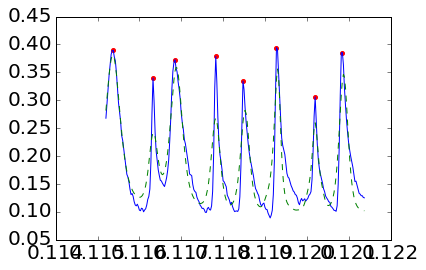

0.31


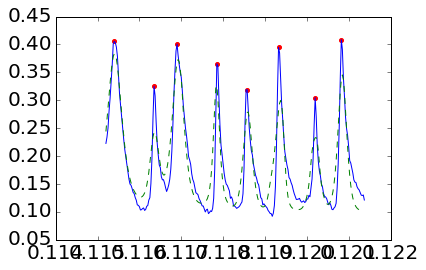

0.32


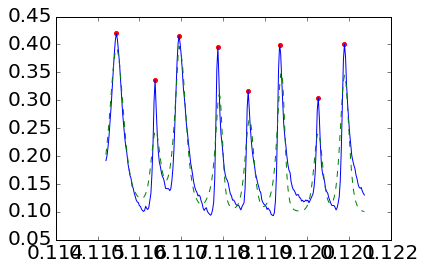

0.33


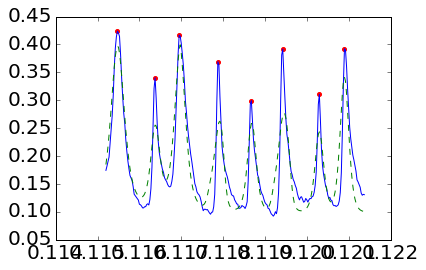

0.34


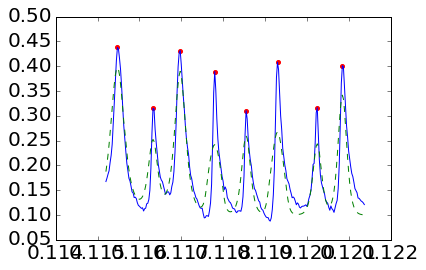

0.35


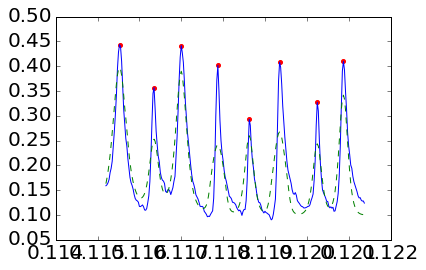

0.36


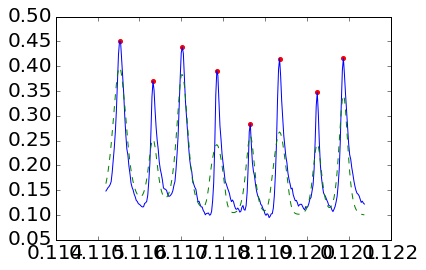

0.37


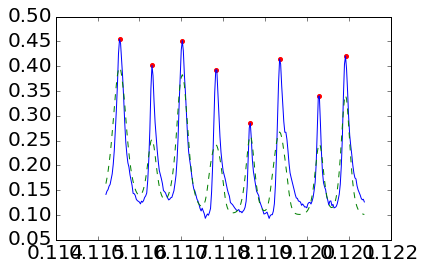

0.38


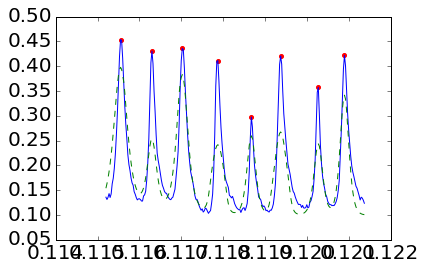

0.39


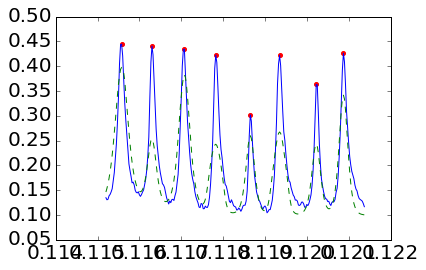

0.4


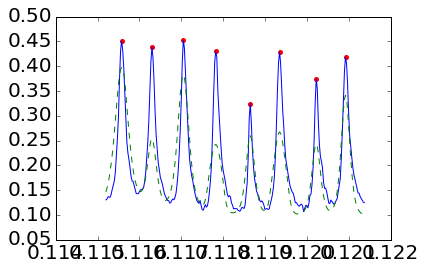

0.41


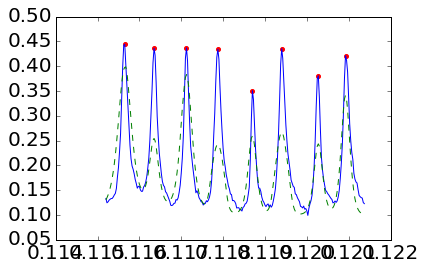

0.42


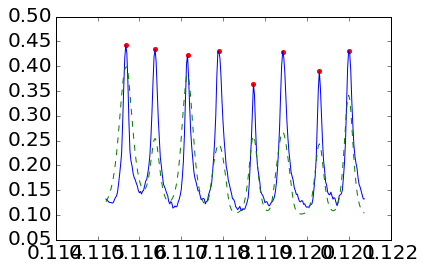

0.43


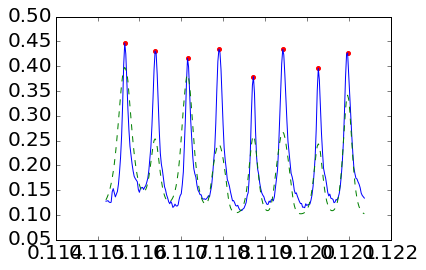

0.44


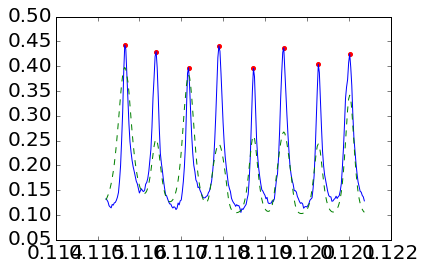

0.45


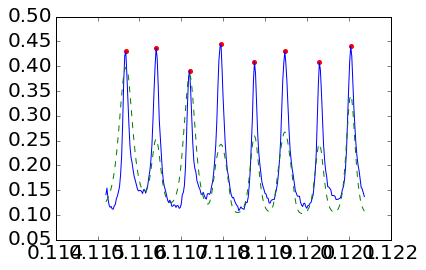

0.46


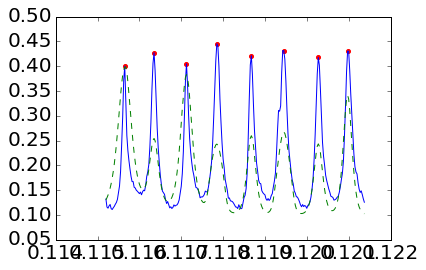

0.47


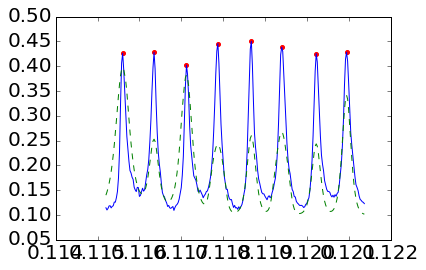

0.48


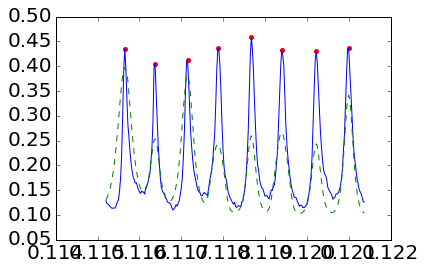

0.49


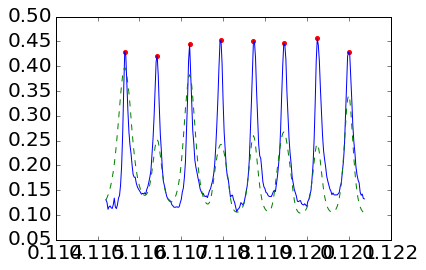

0.5


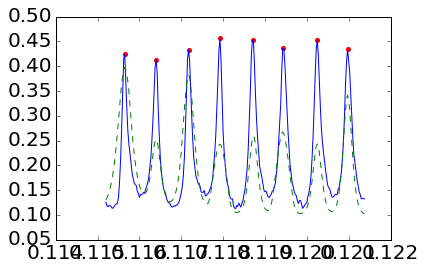

0.51


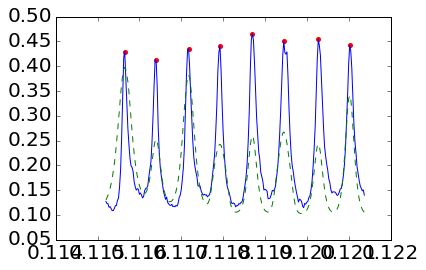

0.52


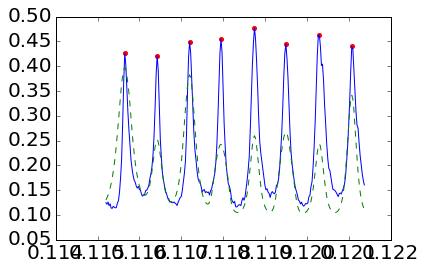

0.53


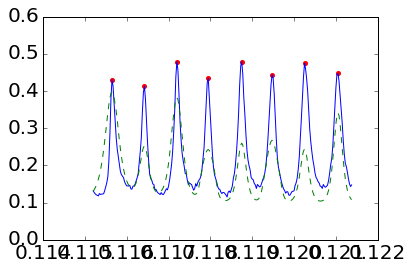

0.54


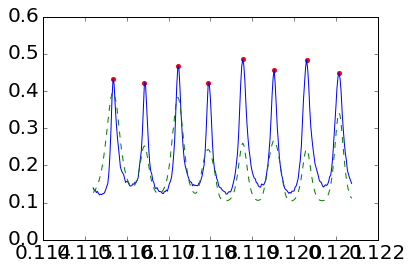

0.55


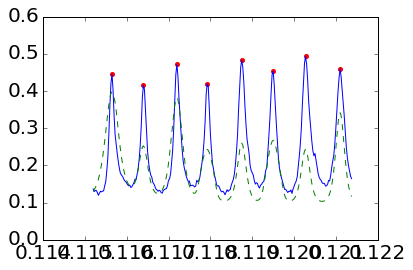

0.56


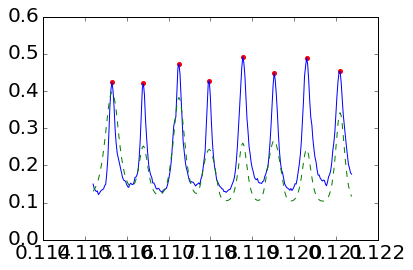

0.57


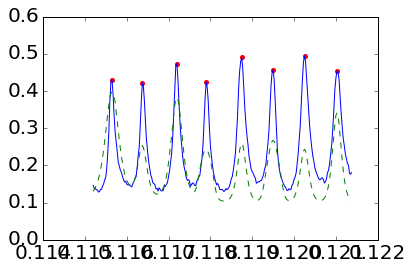

0.58


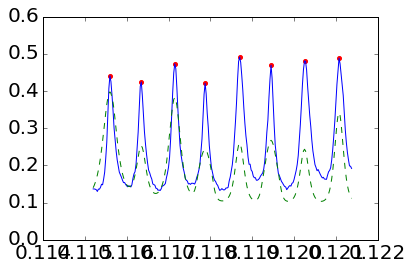

0.59


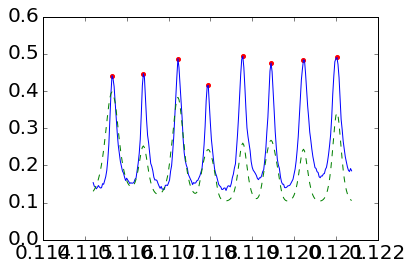

0.6


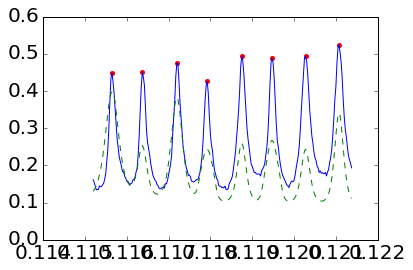

0.61


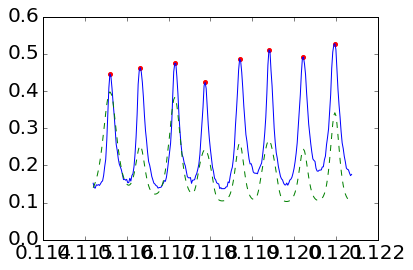

0.62


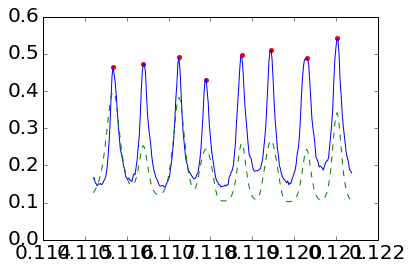

0.63


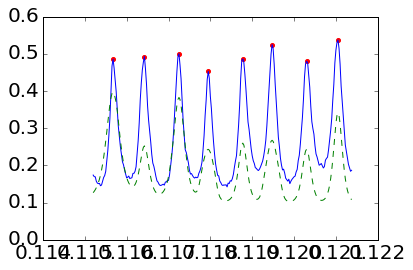

0.64


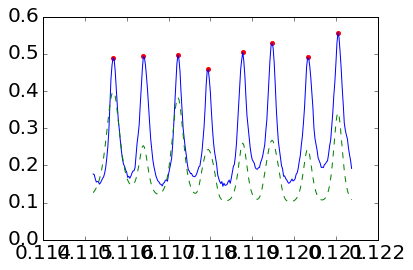

0.65


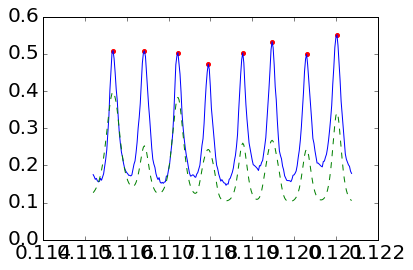

0.66


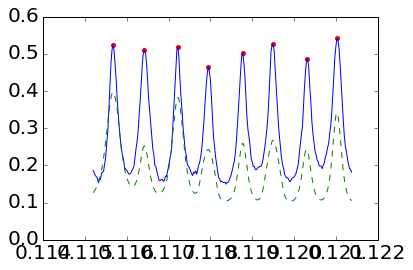

0.67


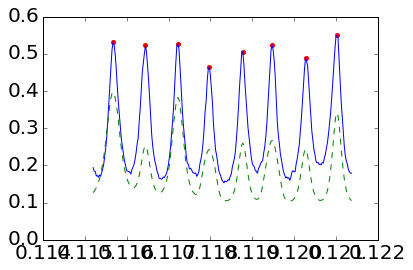

0.68


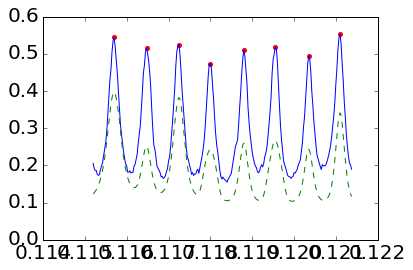

0.69


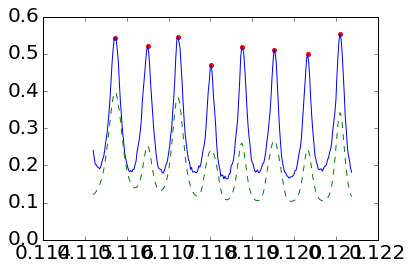

0.7


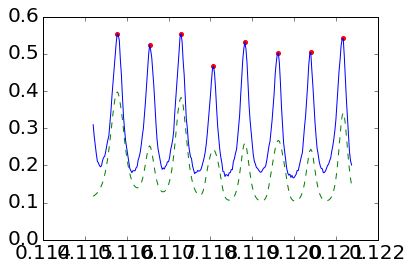

0.71


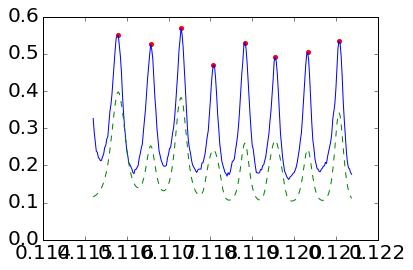

0.72


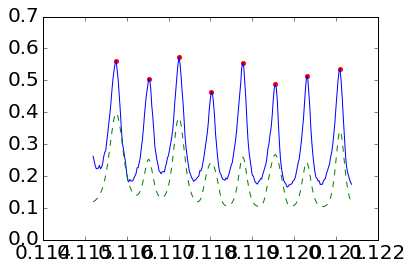

0.73


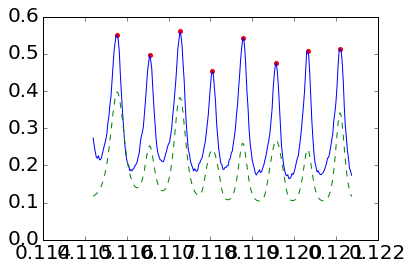

0.74


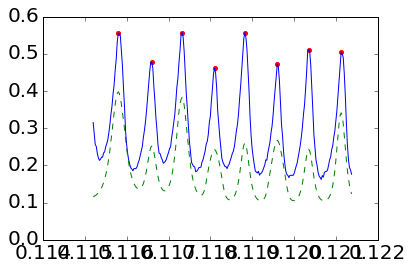

0.75


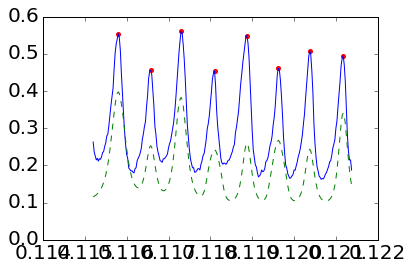

0.76


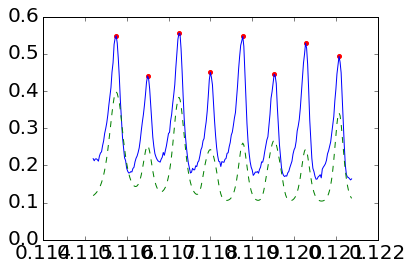

0.77


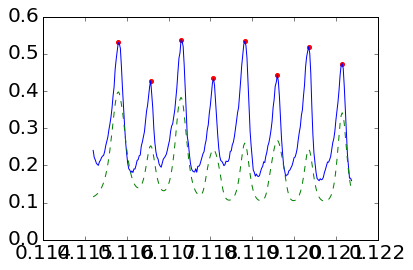

0.78


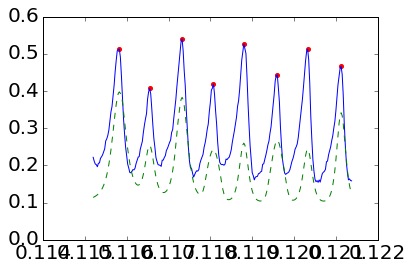

0.79


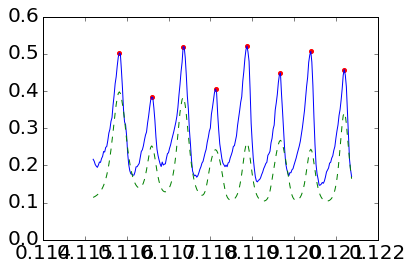

0.8


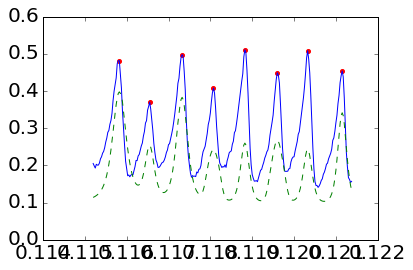

0.81


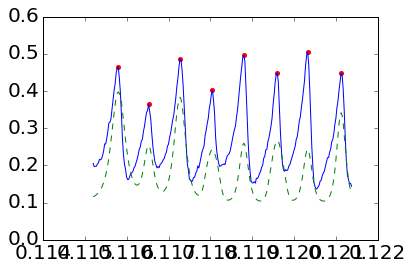

0.82


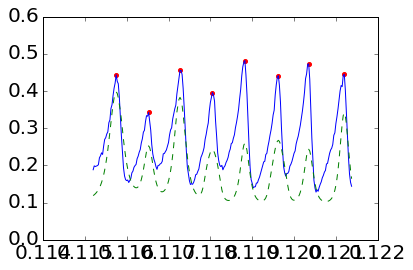

0.83


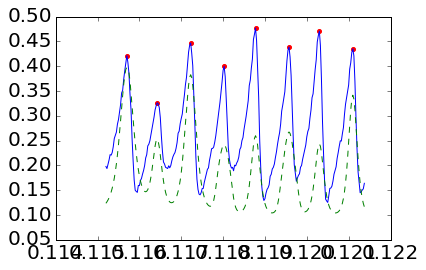

0.84


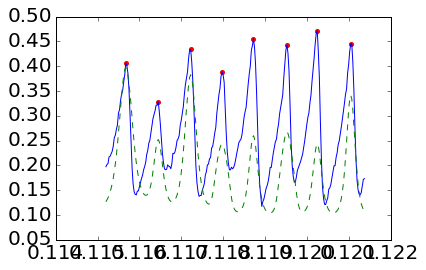

0.85


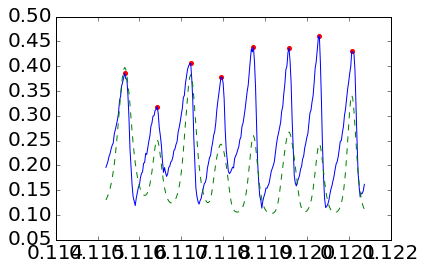

0.86


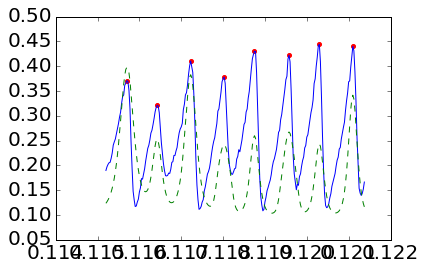

0.87


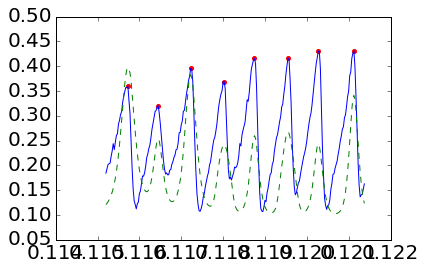

0.88


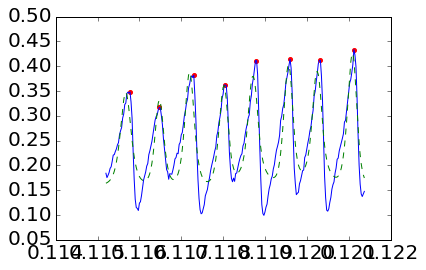

0.89


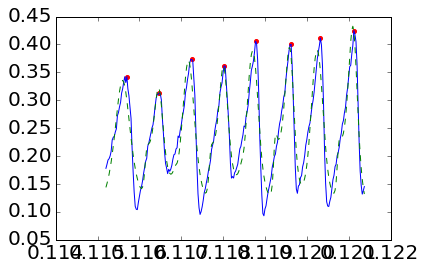

0.9


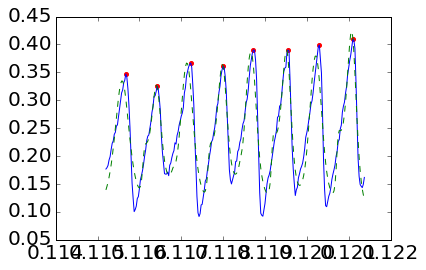

0.91


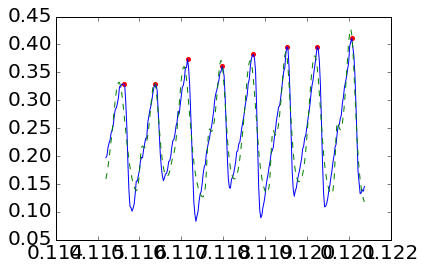

0.92


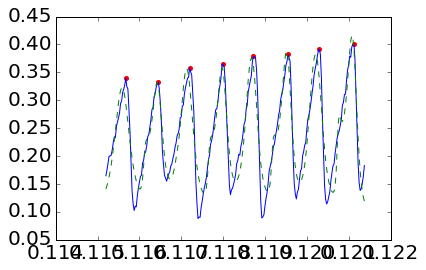

0.93


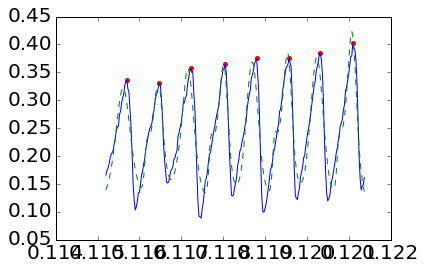

0.94


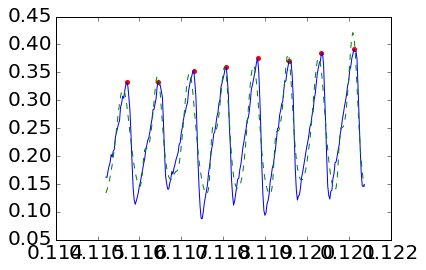

0.95


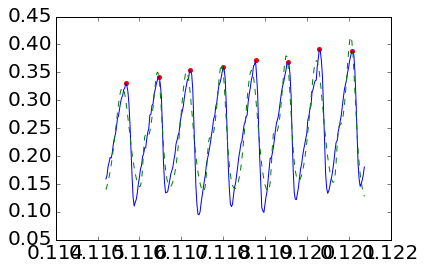

0.96


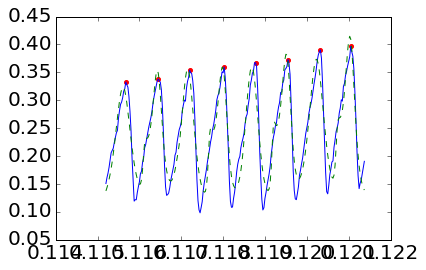

0.97


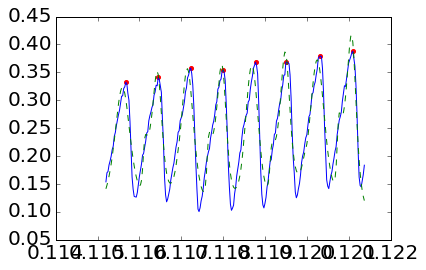

0.98


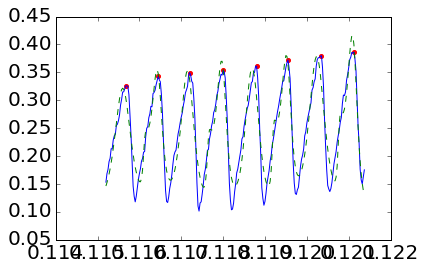

0.99


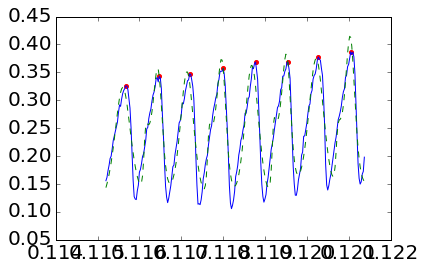

1.0


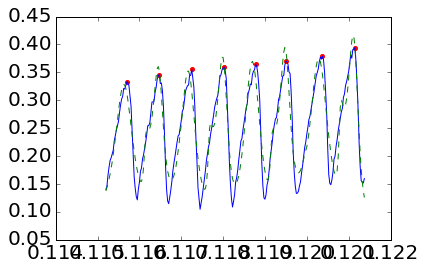

In [54]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
y_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_y_coord.csv', delimiter=',')
G_gate_shifted = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_G_shifted.csv', delimiter=',')
plt.figure(num=13, figsize=(8,8))
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
G = G_gate_shifted.transpose()[idx:idx2].transpose()
twoDmap = plt.pcolor(x_coord, y_coord, G, cmap=cm.get_cmap('seismic'), norm=cm.colors.PowerNorm(gamma=0.65, vmin=0, vmax=0.6))
cb_final=plt.colorbar(twoDmap, shrink=1, pad=0.05)
cb_final.set_label('dI/dV ($2e^2/h$)', size=20)
cb_final.set_ticks(np.arange(-0.2,0.8,0.2))
plt.xlim(Vg_lim_left, Vg_lim_right)
plt.ylim(0, 0.8)
plt.xlabel('PG voltage (V)', size=20)
plt.ylabel('Parallel magnetic field (T)', size=20)
plt.xticks(np.arange(0.116, 0.122, 0.002))
plt.yticks(np.arange(0, 1.0, 0.2))
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

linecut = 0.15 #Field in T where line cut is taken
plt.axhline(y=linecut, xmin=0, xmax=0.05, linewidth=3.5, color = 'lime')
plt.show()

index = y_coord.tolist().index(find_nearest(y_coord, linecut))
fig, ax = plt.subplots(1, 1, figsize=(6,4))
#ax.plot(x_coord, G[index].tolist())
ax.set_title('Island 3 - 122')
ax.set_xlabel('$V_{PG}$ (V)', fontsize = 20)
ax.set_ylabel('$G$ (2e$^2$/h)', fontsize = 20)
#ax.set_xlim((Vg_start, Vg_end))
#ax.set_ylim((0, 0.4))
tick_spacing_x = 0.002
#tick_spacing_y = 5e-5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))
ax.tick_params(direction='out', length=8, width=1.5, right='off', top='off')

peaks = coa.detect_peaks(G[index].tolist(), mph=0.20, mpd=10, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
listpeaks = [x_coord[i] for i in peaks]
#ax.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')

Vgate=x_coord.tolist()
Vgates = [Vgate] * len(listpeaks)
Cond=G[index].tolist()
cond_peaks = [Cond[i] for i in peaks]

fit_single_trace = False
if fit_single_trace == True:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    
    popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.000001, maxfev = 1200)
    popt_list.append(popt)
    pcov_list.append(pcov)
    
    plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
    plt.show()

    
fit_peaks = True
if fit_peaks == True:
    #Fit all Coulomb peaks using the same electron temperature:
    A = 2.0e24
    Gamma = 3.0e9
    T = 0.030
    offset = 0.07
    guess = []
    guess += listpeaks
    guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
    guess += [Gamma] * len(listpeaks)
    guess += [T, offset]
    
    def nifitter(Vgates, *params):
        r = [0] * len(Vgates[0])
        for i,gate in enumerate(Vgates):
            r = np.array(r)+np.array(ifitter(gate, params[i], params[i+len(Vgates)], params[i+2*len(Vgates)], params[-2], params[-1]))
        r = r - (len(Vgates)-1)*params[-1]
        return r.tolist() #np.array(r).flatten()
    
    popt_list = []
    pcov_list = []
    popt = np.array(guess)
    field_values = np.linspace(0.15, 1.00, 86)
    for linecut in field_values:
        print(linecut)
        index = y_coord.tolist().index(find_nearest(y_coord, linecut))
        plt.plot(x_coord, G[index].tolist())
        peaks = coa.detect_peaks(G[index].tolist(), mph=0.25, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
        listpeaks = [x_coord[i] for i in peaks]
        plt.scatter(listpeaks, [G[index].tolist()[x] for x in peaks], 16, marker='o', color='r')
        Cond=G[index].tolist()
        cond_peaks = [Cond[i] for i in peaks]
        
        guess = []
        guess += listpeaks
        #guess += (np.array([A] * len(listpeaks))*max(cond_peaks)/np.array(cond_peaks)).tolist()
        #guess += [Gamma] * len(listpeaks)
        #guess += [T, offset]
        guess += popt.tolist()[len(listpeaks):]
        
        popt, pcov = scipy.optimize.curve_fit(nifitter, Vgates, Cond, p0=guess, xtol = 0.00000002, maxfev = 3000)
        popt_list.append(popt)
        pcov_list.append(pcov)

    
        #h*Gamma, 4kT, Gamma/GHz, T

        plt.plot(Vgates[0], nifitter(Vgates, *popt), 'g--')
        plt.show()
        plt.figure()

In [42]:
peaks = []
for i,el in enumerate(popt_list):
    peaks.append(el[0:7])
np.savetxt('Coulomb peak analysis Island 3 - 110_peaks_150-710.csv', peaks, delimiter=',')

In [45]:
peaks = []
for i,el in enumerate(popt_list):
    peaks.append(el[0:7])
np.savetxt('Coulomb peak analysis Island 3 - 110_peaks_150-800.csv', peaks, delimiter=',')

In [48]:
peaks = []
for i,el in enumerate(popt_list):
    peaks.append(el[0:7])
np.savetxt('Coulomb peak analysis Island 3 - 110_peaks_150-190.csv', peaks, delimiter=',')

In [58]:
peaks = []
for i,el in enumerate(popt_list[:3]):
    peaks.append(el[0:7])
np.savetxt('Coulomb peak analysis Island 3 - 110_peaks_150-170.csv', peaks, delimiter=',')

In [55]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
G2 = []
peaks_list = []
for i,el in enumerate(popt_list):
    G2.append(nifitter(Vgates, *el))
    peaks = coa.detect_peaks(G2[i], mph=0.25, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
    peaks_list.append([G2[i][x] for x in peaks])
np.savetxt('Coulomb peak analysis Island 3 - 110_amplitude_150-190.csv', peaks_list, delimiter=',')

In [59]:
x_coord = np.loadtxt('H:\\My Documents\\Paper\\Coulomb peak analysis Island 3 - 110_x_coord.csv', delimiter=',')
Vg_lim_left = 0.1152
Vg_lim_right = 0.1214
idx = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_left))
idx2 = x_coord.tolist().index(find_nearest(x_coord,Vg_lim_right))
x_coord = x_coord[idx:idx2]
Vgate=x_coord.tolist()
Vgates = [Vgate] * 8
G2 = []
peaks_list = []
for i,el in enumerate(popt_list[:3]):
    G2.append(nifitter(Vgates, *el))
    peaks = coa.detect_peaks(G2[i], mph=0.25, mpd=15, threshold=0, edge='both', kpsh=False, valley=False, show=False, ax=None)
    peaks_list.append([G2[i][x] for x in peaks])
np.savetxt('Coulomb peak analysis Island 3 - 110_amplitude_150-170.csv', peaks_list, delimiter=',')

In [65]:
peaks = []
for i,el in enumerate(popt_list[:3]):
    peaks.append(el[16:24])
np.savetxt('Coulomb peak analysis Island 3 - 110_gamma_150-170.csv', peaks, delimiter=',')